In [1]:
from FCAnalysis import *

In [2]:
import pyedflib
from mpl_toolkits.mplot3d  import Axes3D

In [3]:
f = pyedflib.EdfReader(r"D:\data\FCDataAnalysis\yaoxinyi-sz1.edf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()
record = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    record[i, :] = f.readSignal(i)

In [4]:
sampleFreq = f.getSampleFrequency(1)
signalSam = f.getNSamples()[1]
sigDur = f.getFileDuration()
sampleFreq,signalSam,sigDur,signalSam/sigDur

(999, 901068, 901, 1000.0754716981132)

In [5]:
sampleFreq = 1000

In [6]:
#10-400（发作间期），612（起始点）,617（关注点）,633（结束点）
# SOZ  81-82，4-8
c81 = [2.702040, -3.116715, 6.694432]
c82 = [2.861921, -3.375413, 6.688459]

c4 = [1.550549, -3.096932, 7.248825]
c5 = [1.666359, -3.360000, 7.301189]
c6 = [1.873134, -3.690987, 7.311234]
c7 = [1.972259, -3.991350, 7.393227]
c8 = [2.163575, -4.284868, 7.393201]

ez_c = np.array([c81,c82,c4,c5,c6,c7,c8])
# PP  15-16，23-24，42-45
c15 = [2.813373, -3.062771, 4.844960]
c16 = [2.960595, -3.088334, 5.161460]

c23 = [3.991150, -3.267275, 7.376959]
c24 = [4.138372, -3.292838, 7.693459]

c42 = [1.487235, -2.365874, 8.171350]
c43 = [1.518481, -2.674723, 8.355182]
c44 = [1.549333, -2.964988, 8.540124]
c45 = [1.562389, -3.292745, 8.721689]

pz_c = np.array([c15,c16,c23,c24,c42,c43,c44,c45])
# NIZ  28-31，50-52，77-79
c28 = [2.806005, -3.766166, 5.208582]
c29 = [2.810208, -4.114843, 5.238696]
c30 = [2.814411, -4.463519, 5.268810]
c31 = [2.818614, -4.812196, 5.298925]

c50 = [0.061752, -1.536019, 8.735414]
c51 = [0.073662, -1.885596, 8.747822]
c52 = [0.085571, -2.235173, 8.760230]

c77 = [2.107438, -2.082367, 9.217914]
c78 = [2.282581, -2.339542, 9.378181]
c79 = [2.457725, -2.596717, 9.538449]

niz_c = np.array([c28,c29,c30,c31,c50,c51,c52,c77,c78,c79])

zone_c = np.array([ez_c,pz_c,niz_c])

In [7]:
#10-400（发作间期），612（起始点）,617（关注点）,633（结束点）
# SOZ  81-82，4-8
c81_82 = points_center(c81,c82)

c4_5 = points_center(c4,c5)
c5_6 = points_center(c5,c6)
c6_7 = points_center(c6,c7)
c7_8 = points_center(c7,c8)

ez_ct = np.array([c81_82,c4_5,c5_6,c6_7,c7_8])

# PP  15-16，23-24，42-45
c15_16 = points_center(c15,c16)
c23_24 = points_center(c23,c24)

c42_43 = points_center(c42,c43)
c43_44 = points_center(c43,c44)
c44_45 = points_center(c44,c45)

pz_ct = np.array([c15_16,c23_24,c42_43,c43_44,c44_45])

# NIZ  28-31，50-52，77-79
c28_29 = points_center(c28,c29)
c29_30 = points_center(c29,c30)
c30_31 = points_center(c30,c31)

c50_51 = points_center(c50,c51)
c51_52 = points_center(c51,c52)

c77_78 = points_center(c77,c78)
c78_79 = points_center(c78,c79)

niz_ct = np.array([c28_29,c29_30,c30_31,c50_51,c51_52,c77_78,c78_79])

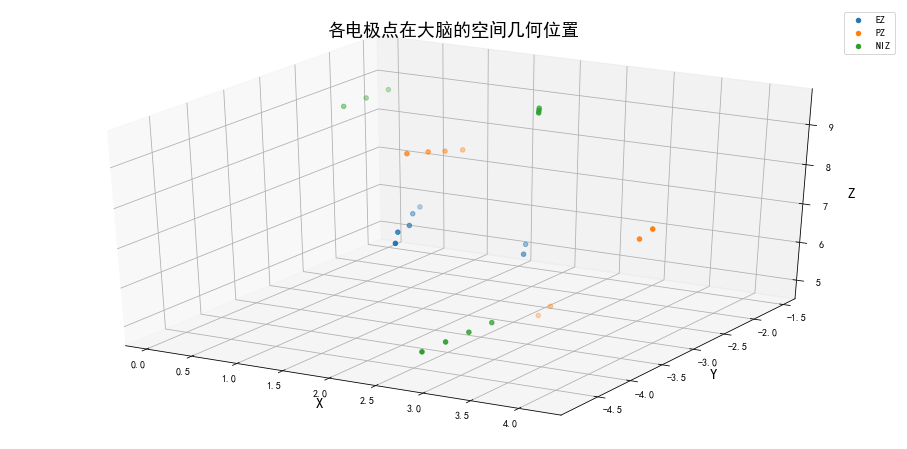

In [10]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
label_c=['EZ','PZ','NIZ']

for i in range(len(zone_c)):
    ax.scatter(zone_c[i][:,0],zone_c[i][:,1],zone_c[i][:,2],label=label_c[i])

#ax.scatter(zone_c[2][-3:,0],zone_c[2][-3:,1],zone_c[2][-3:,2],label=label_c[2])
ax.set_xlabel('X',fontsize=15)
ax.set_ylabel('Y',fontsize=15)
ax.set_zlabel('Z',fontsize=15)
plt.legend()
plt.title("各电极点在大脑的空间几何位置",fontsize=18)
plt.show()

In [11]:
#10-400（发作间期），612（起始点）,617（关注点）,633（结束点）
# SOZ  81-82，4-8
s81_82 = record[81]-record[82]

s4_5 = record[4]-record[5]
s5_6 = record[5]-record[6]
s6_7 = record[6]-record[7]
s7_8 = record[7]-record[8]

ez_s = np.array([s81_82,s4_5,s5_6,s6_7,s7_8])

# PP  15-16，23-24，42-45
s15_16 = record[15]-record[16]
s23_24 = record[23]-record[24]

s42_43 = record[42]-record[43]
s43_44 = record[43]-record[44]
s44_45 = record[44]-record[45]

pz_s = np.array([s15_16,s23_24,s42_43,s43_44,s44_45])

# NIZ  28-31，50-52，77-79
s28_29 = record[28]-record[29]
s29_30 = record[29]-record[30]
s30_31 = record[30]-record[31]

s50_51 = record[50]-record[51]
s51_52 = record[51]-record[52]

s77_78 = record[77]-record[78]
s78_79 = record[78]-record[79]

niz_s = np.array([s28_29,s29_30,s30_31,s50_51,s51_52,s77_78,s78_79])

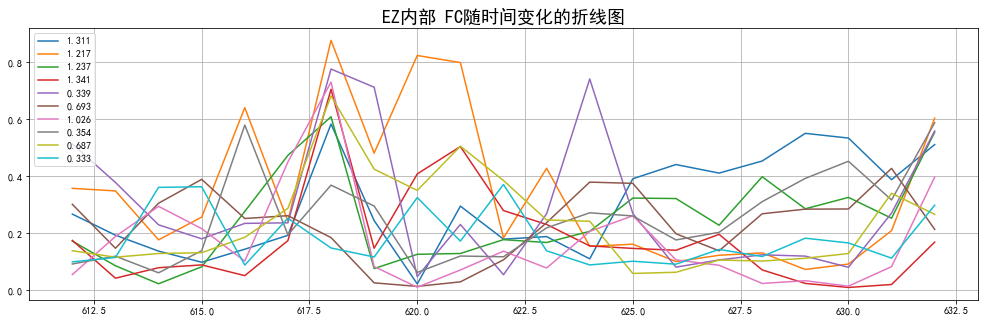

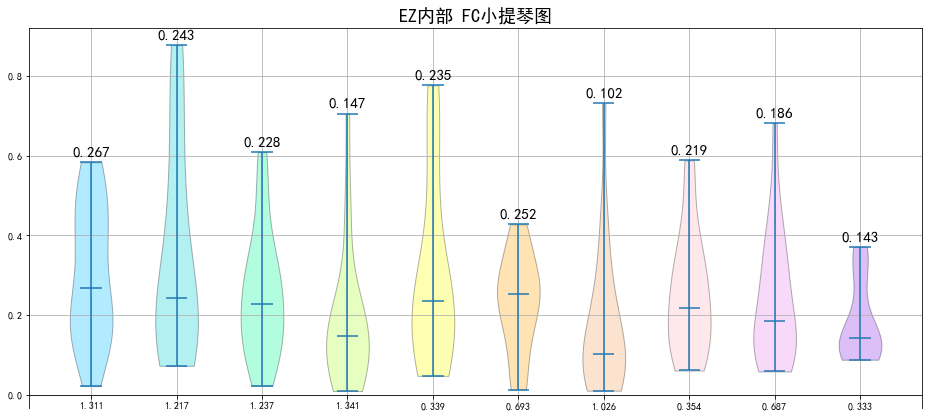

In [16]:
ez = h2_in_suit(ez_s,ez_ct,'EZ内部',612,23,sampleFreq,slideWindow=2,maxlag=0.001)

In [17]:
ez[3]

0.2235751024552547

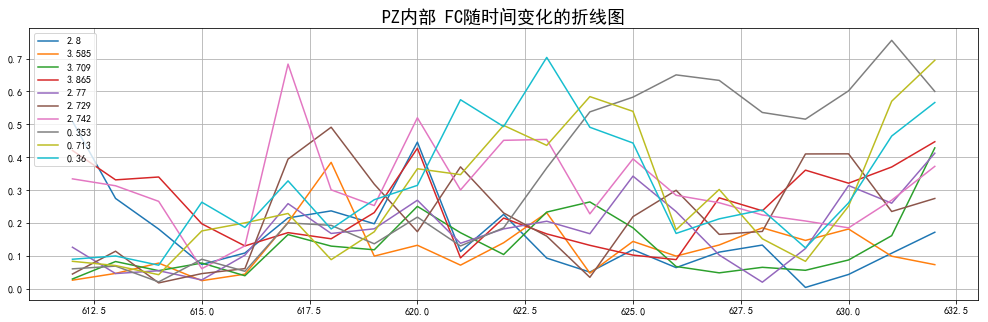

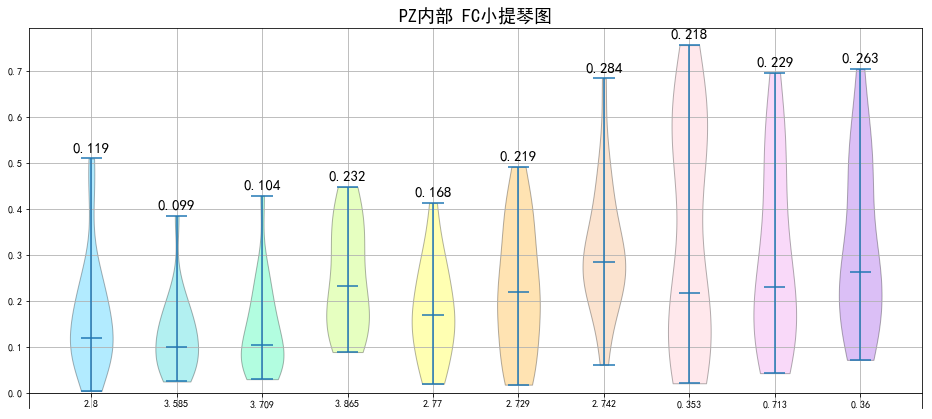

In [20]:
pz = h2_in_suit(pz_s,pz_ct,'PZ内部',612,23,sampleFreq,maxlag=0.001)

In [21]:
pz[3]

0.21870260084208815

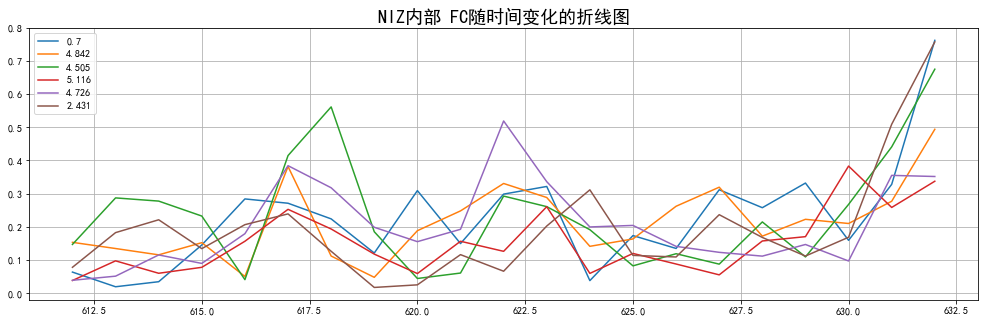

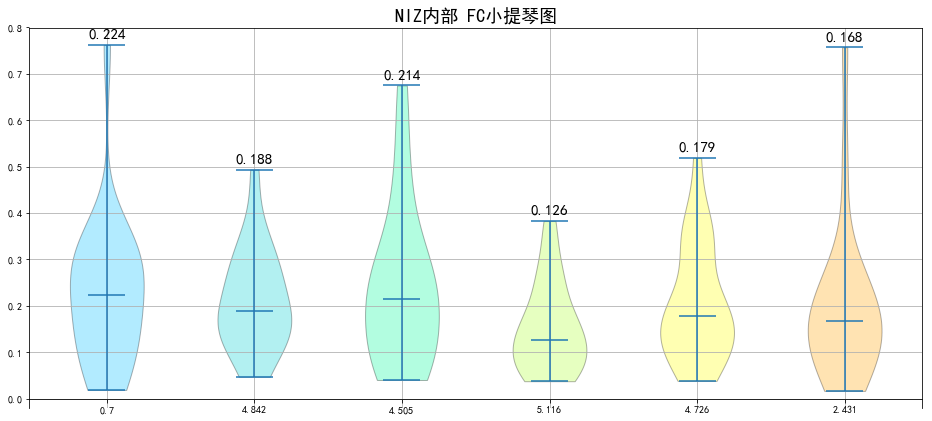

In [23]:
niz = h2_in_suit(niz_s[::2],niz_ct[::2],'NIZ内部',612,23,sampleFreq,maxlag=0.001)

In [24]:
niz[3]

0.18350431673999779

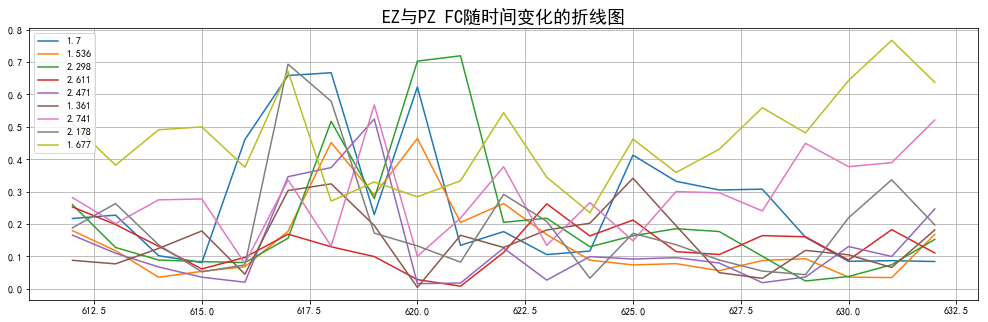

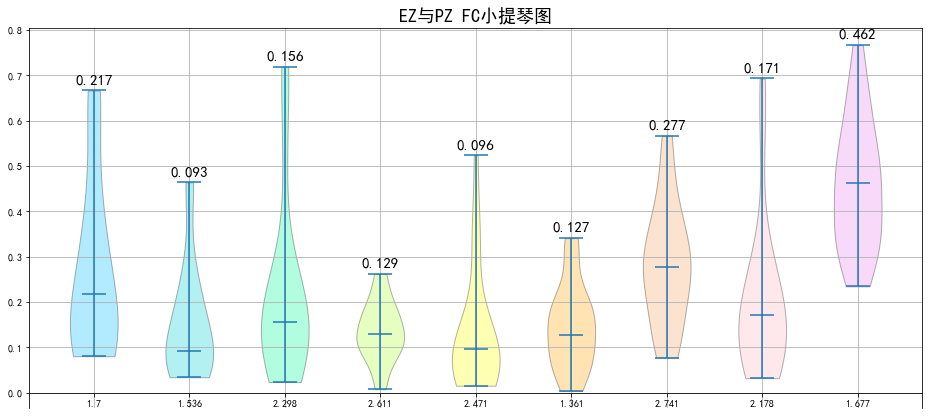

In [25]:
ez_pz = h2_btw_suit(ez_s[[0,1,4]],pz_s[[0,1,4]],ez_ct[[0,1,4]],pz_ct[[0,1,4]],'EZ与PZ',612,23,sampleFreq,maxlag=0.001)

In [26]:
ez_pz[3]

0.15575323454126222

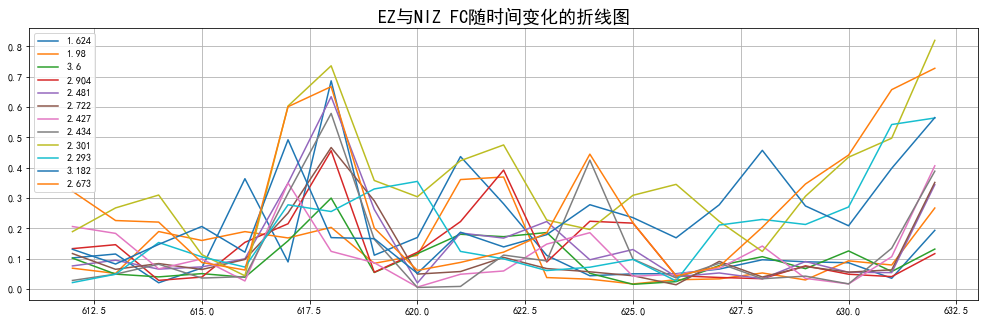

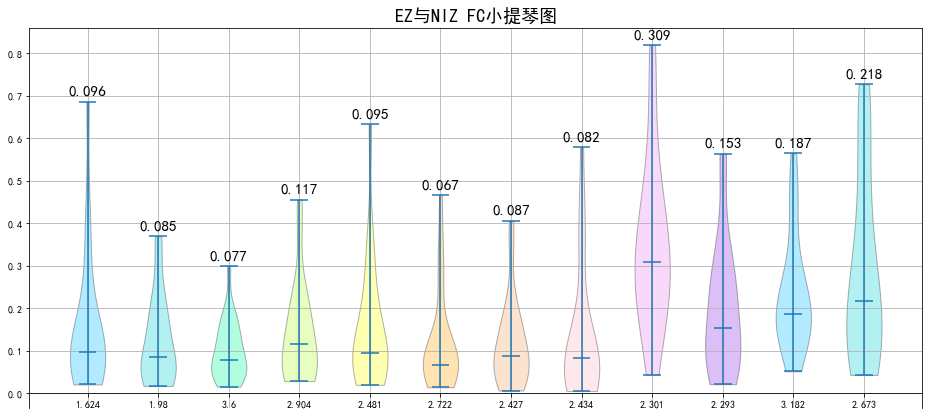

In [29]:
ez_niz = h2_btw_suit(ez_s[[0,1,4]],niz_s[::2],ez_ct[[0,1,4]],niz_ct[::2],'EZ与NIZ',612,23,sampleFreq,maxlag=0.001)

In [30]:
ez_niz[3]

0.09573012607863124

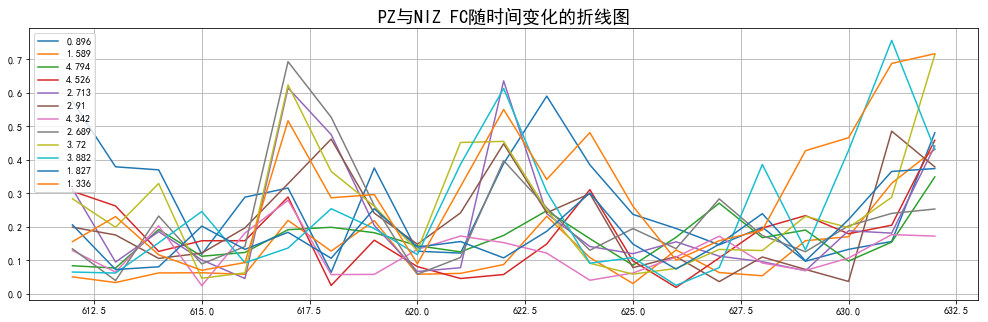

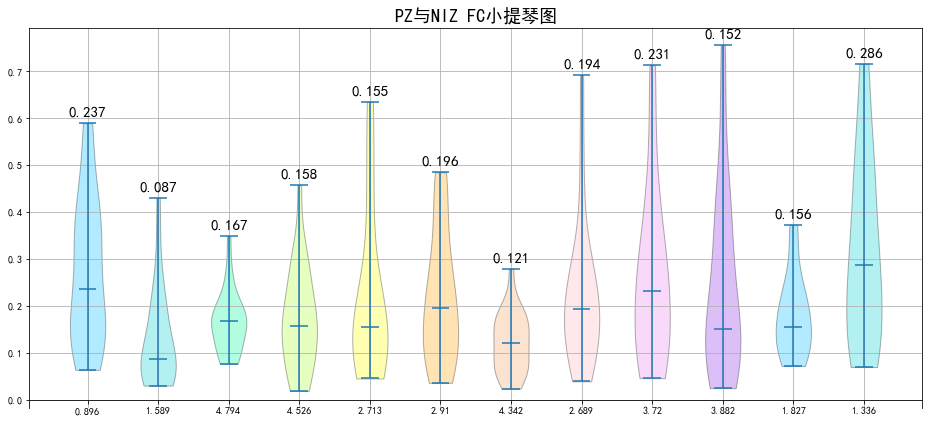

In [31]:
pz_niz = h2_btw_suit(pz_s[[0,1,4]],niz_s[::2],pz_ct[[0,1,4]],niz_ct[::2],'PZ与NIZ',612,23,sampleFreq,maxlag=0.001)

In [32]:
pz_niz[3]

0.16263017865640644

In [33]:
#ez_all = np.ravel(ez[1])
ez_all = np.ravel([i[0] for i in ez[1]])
pz_all = np.ravel([i[0] for i in pz[1]])
niz_all = np.ravel([i[0] for i in niz[1]])
ez_pz_all = np.ravel([i[0] for i in ez_pz[1]])
ez_niz_all = np.ravel([i[0] for i in ez_niz[1]])
pz_niz_all = np.ravel([i[0] for i in pz_niz[1]])

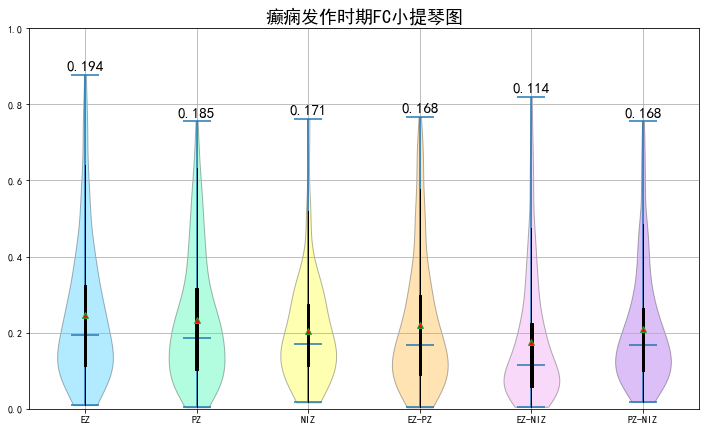

In [34]:
violinbox([ez_all,pz_all,niz_all,ez_pz_all,ez_niz_all,pz_niz_all],'癫痫发作时期FC小提琴图')

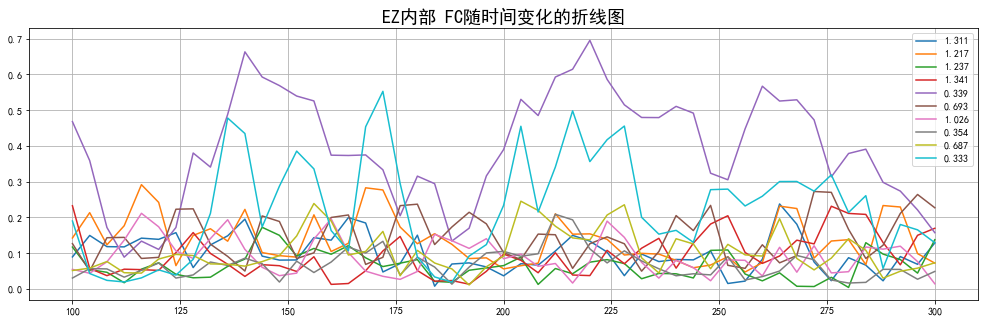

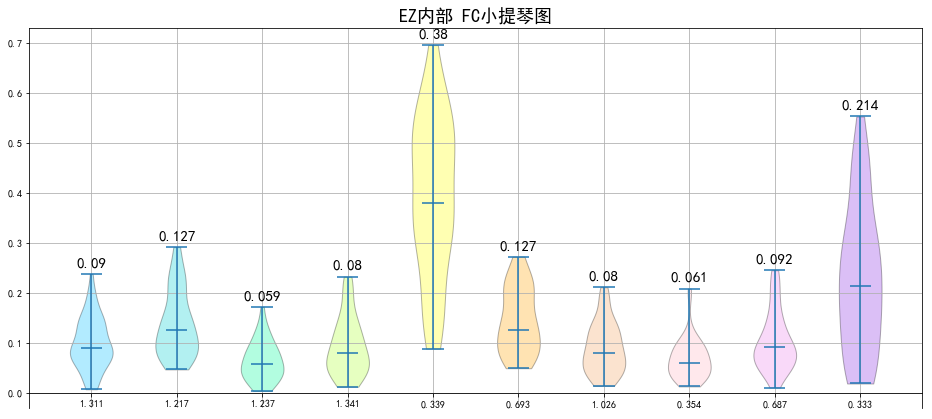

In [36]:
ezi = h2_in_suit(ez_s,ez_ct,'EZ内部',100,209,sampleFreq,slideWindow=8,step=4,maxlag=0.001)

In [37]:
ezi[3]

0.09087504942737018

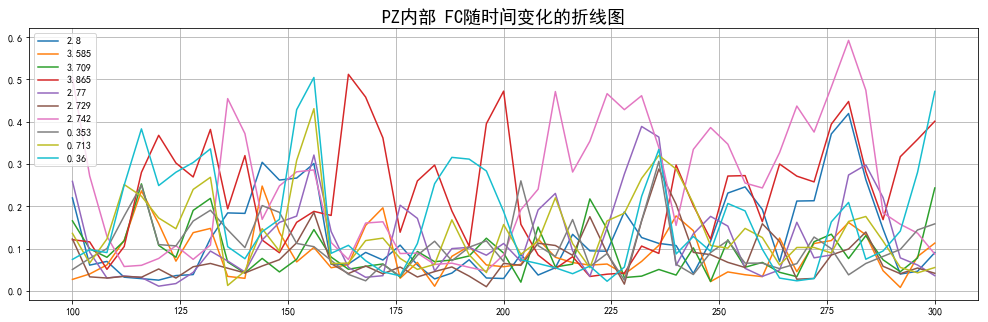

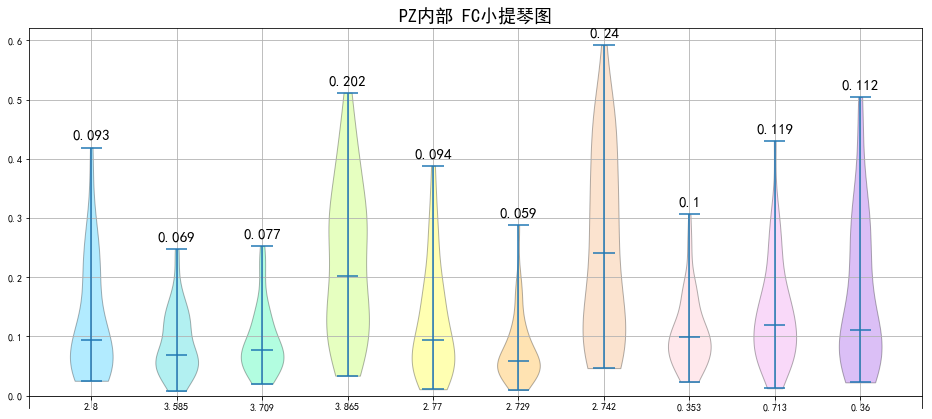

In [39]:
pzi = h2_in_suit(pz_s,pz_ct,'PZ内部',100,209,sampleFreq,slideWindow=8,step=4,maxlag=0.001)

In [40]:
pzi[3]

0.0968500067266444

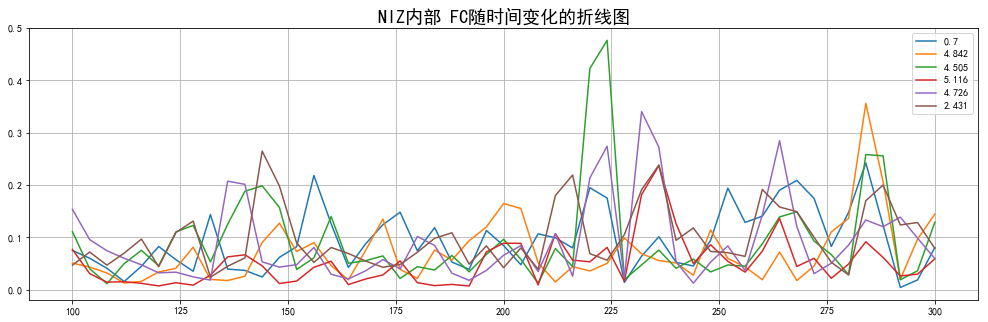

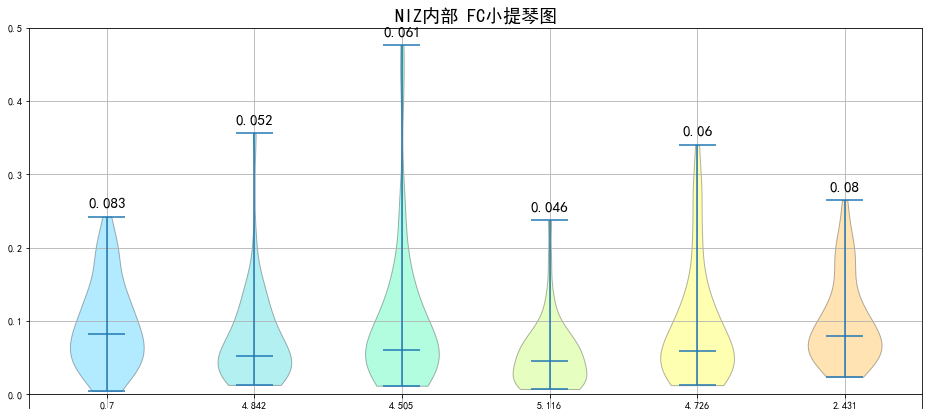

In [41]:
nizi = h2_in_suit(niz_s[::2],niz_ct[::2],'NIZ内部',100,209,sampleFreq,slideWindow=8,step=4,maxlag=0.001)

In [42]:
nizi[3]

0.06028584439482493

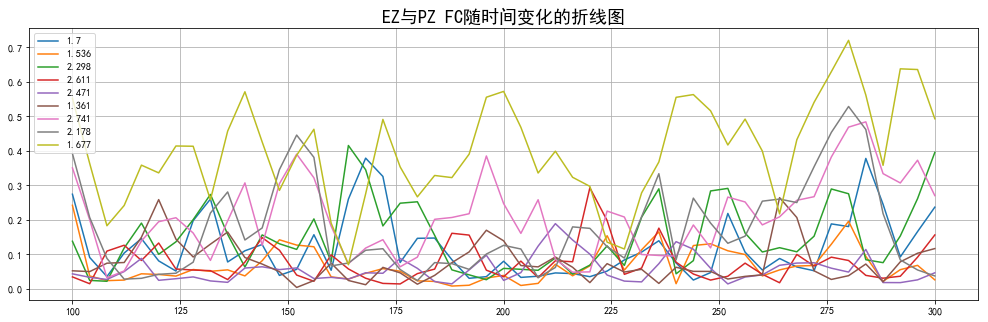

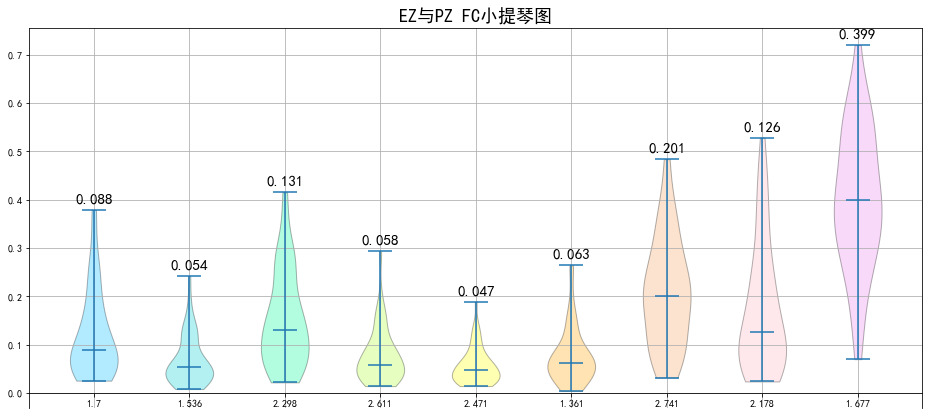

In [44]:
ez_pzi = h2_btw_suit(ez_s[[0,1,4]],pz_s[[0,1,4]],ez_ct[[0,1,4]],pz_ct[[0,1,4]],'EZ与PZ',100,209,sampleFreq,slideWindow=8,step=4,maxlag=0.001)

In [45]:
ez_pzi[3]

0.08799695158453857

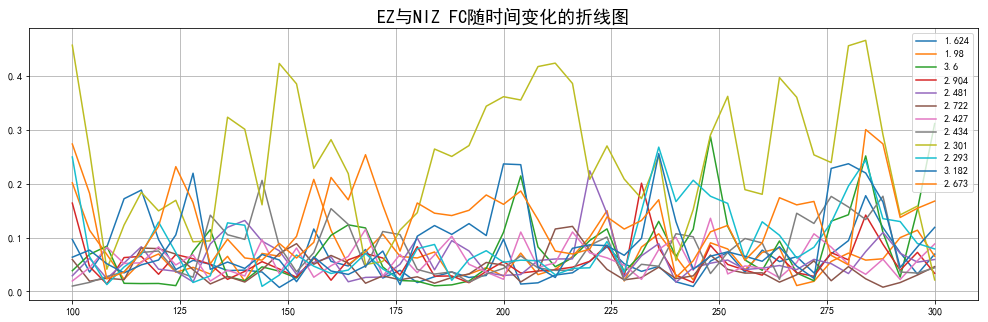

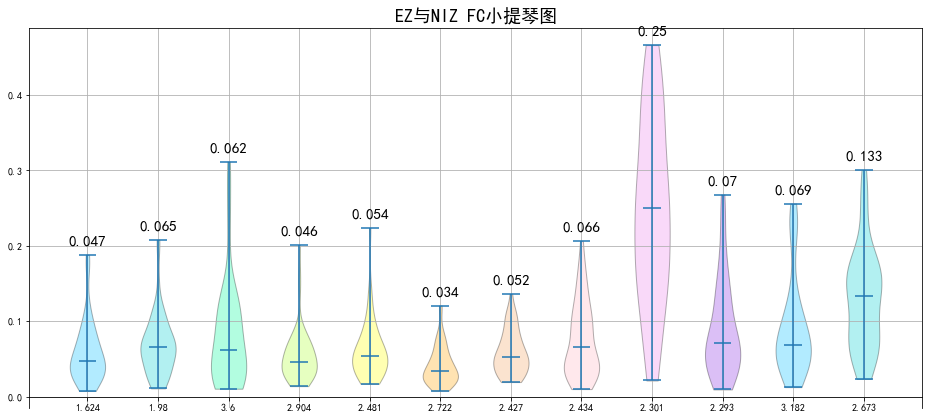

In [46]:
ez_nizi = h2_btw_suit(ez_s[[0,1,4]],niz_s[::2],ez_ct[[0,1,4]],niz_ct[::2],'EZ与NIZ',100,209,sampleFreq,slideWindow=8,step=4,maxlag=0.001)

In [47]:
ez_nizi[3]

0.06377284059034533

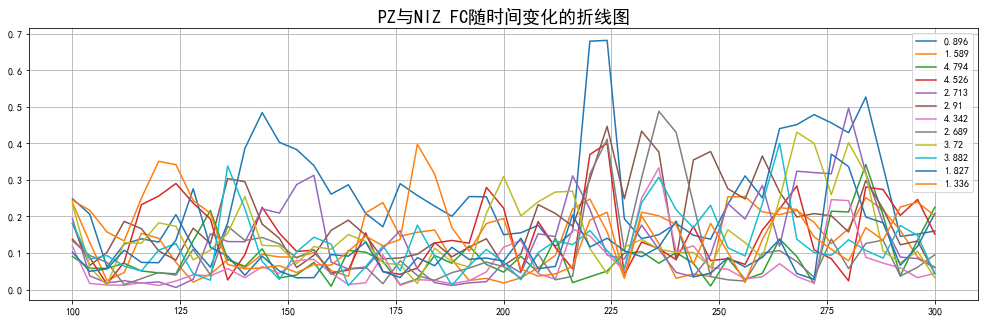

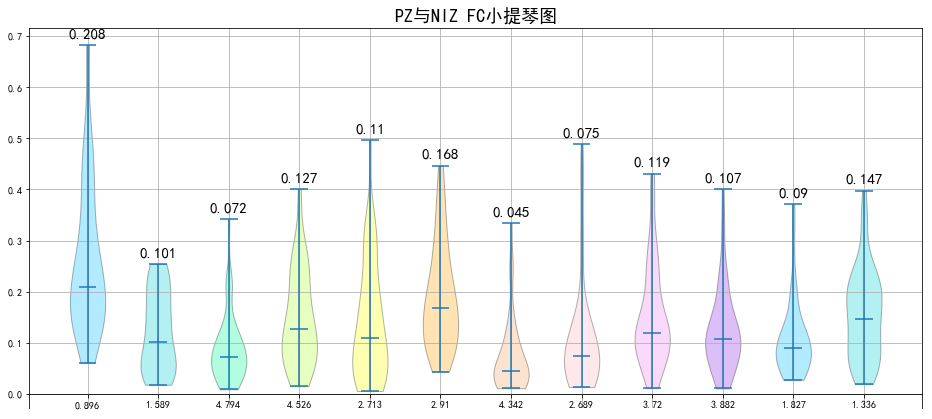

In [48]:
pz_nizi = h2_btw_suit(pz_s[[0,1,4]],niz_s[::2],pz_ct[[0,1,4]],niz_ct[::2],'PZ与NIZ',100,209,sampleFreq,slideWindow=8,step=4,maxlag=0.001)

In [49]:
pz_nizi[3]

0.10849676870428754

In [50]:
ezi_all = np.ravel([i[0] for i in ezi[1]])
pzi_all = np.ravel([i[0] for i in pzi[1]])
nizi_all = np.ravel([i[0] for i in nizi[1]])
ez_pzi_all = np.ravel([i[0] for i in ez_pzi[1]])
ez_nizi_all = np.ravel([i[0] for i in ez_nizi[1]])
pz_nizi_all = np.ravel([i[0] for i in pz_nizi[1]])

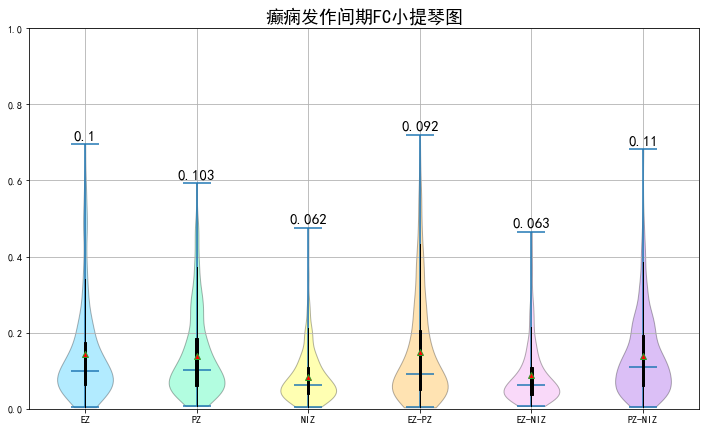

In [51]:
violinbox([ezi_all,pzi_all,nizi_all,ez_pzi_all,ez_nizi_all,pz_nizi_all],'癫痫发作间期FC小提琴图')